![an artist who join "KCON Thailand 2019"](img\kcon.jpg)

# Import necessary library

In [1]:
import json
import pandas as pd

# Read data

In [45]:
tweets_data = []

In [46]:
tweets_data_path = 'twitter_data_4.txt'

tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print(len(tweets_data))

22895


In [47]:
# tweets_data[len(tweets_data)-1]

# Reformat time and convert UTC To THAI time zone

In [48]:
from datetime import datetime, timezone
import pytz

In [49]:
thai_tz = pytz.timezone('Asia/Bangkok') # thai time zone

In [50]:
# tweets_data[len(tweets_data)-1]

In [51]:
# find error
lst_error = []
for i in range(len(tweets_data)):
    try:
        tweets_data[i]['created_at'].split(' ')
    except:
        lst_error.append(i)

In [52]:
print(lst_error)

[]


In [53]:
# tweets_data[73159]

In [54]:
day = []
for i in range(len(tweets_data)):
    if i not in lst_error:
        lst = tweets_data[i]['created_at'].split(' ')
        tweets_data[i]['id'] = lst[0] # เก็บวันไวเในช่อง id
        date = (lst[5]+'.'+lst[1]+'.'+lst[2]+' '+lst[3])
        date_time = datetime.strptime(date, '%Y.%b.%d %H:%M:%S')
        tweets_data[i]['created_at'] =  date_time.replace(tzinfo=timezone.utc).astimezone(thai_tz) # reset info and convert to thai timezone
#         thai_time.strftime('%Y-%m-%d %H:%M:%S') # return time format yyyy-mm-dd hh:mm:ss
#         print(tweets_data[i]['created_at'])
#     else:
#         print(i)

In [55]:
tweets_data[73159]

IndexError: list index out of range

In [56]:
# Remove error

In [57]:
# if len(lst_error) != 0:
#     while True:
#         try:
#             for i in lst_error:
#                 del(tweets_data[i])
#                 print('delete complete')
#         except:
#             break

# Test area

In [58]:
# tweets_data[73208]

In [59]:
for i in range(len(tweets_data)):
    try:
        check = tweets_data[i]['created_at']
    except:
        print(i)

In [60]:
time = [tweets_data[i]['created_at'] for i in range(len(tweets_data)) if i not in lst_error]
language = [tweets_data[i]['lang'] for i in range(len(tweets_data)) if i not in lst_error]
text =[tweets_data[i]['text'] for i in range(len(tweets_data)) if i not in lst_error]
day = [tweets_data[i]['id'] for i in range(len(tweets_data)) if i not in lst_error]

In [61]:
df = pd.DataFrame({'time':time, 'day':day, 'language':language, 'text':text})

In [62]:
tweets_data[len(tweets_data)-1]

{'created_at': datetime.datetime(2019, 8, 31, 23, 33, 9, tzinfo=<DstTzInfo 'Asia/Bangkok' +07+7:00:00 STD>),
 'id': 'Sat',
 'id_str': '1167837739074473984',
 'text': 'RT @KCONThailand: [#KCON2019THAILAND]\nมา D.D.D~ กับ #THEBOYZ ที่ #KCON19TH กัน~\nTHE B ที่พร้อมแล้ว ขอเสียงหน่อย~~\n\nวิธีที่จะได้ใช้เวลาทั้ง…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1385566650,
  'id_str': '1385566650',
  'name': 'Ann Hernandez',
  'screen_name': 'AnnAnnhern1234',
  'location': 'Santa Monica\\Los Angeles, CA',
  'url': None,
  'description': None,
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 268,
  'friends_count': 1411,
  'listed_count': 2,
  'favourites_count': 55210,
  'statuses_count': 16807,


In [63]:
df.tail(5)

,time,day,language,text
22890,2019-08-31 23:32:44+07:00,Sat,en,RT @KCONThailand: [#KCON2019THAILAND ]\nHappy ...
22891,2019-08-31 23:32:55+07:00,Sat,en,RT @X1PHOfficial_: [INFO]190829\n\n🦋 @x1offici...
22892,2019-08-31 23:32:59+07:00,Sat,en,RT @KCONThailand: [#KCON2019THAILAND ]\nHappy ...
22893,2019-08-31 23:33:01+07:00,Sat,en,RT @KCONThailand: [#KCON2019THAILAND ]\nHappy ...
22894,2019-08-31 23:33:09+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nมา D.D....


In [64]:
df['language'].value_counts()

th     21771
en       691
und      296
ko        46
in        27
tl        13
ja        12
es        10
tr         9
vi         4
ru         3
pt         3
et         2
zh         2
my         1
ar         1
lt         1
fr         1
ht         1
it         1
Name: language, dtype: int64

In [65]:
tweets_data[700]

{'created_at': datetime.datetime(2019, 8, 31, 8, 27, 44, tzinfo=<DstTzInfo 'Asia/Bangkok' +07+7:00:00 STD>),
 'id': 'Sat',
 'id_str': '1167609884117913601',
 'text': 'RT @KCONThailand: [#KCON2019THAILAND]\nLove Call สำหรับ ONE IT พิกกี้บูบู้ของ #X1\nตอบรับกันตอนนี้เลย!\n\nการพบกันครั้งแรกของ X1 และ ONE IT ➤ h…',
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 915943695907618817,
  'id_str': '915943695907618817',
  'name': 'Jobless',
  'screen_name': '_penguinkyung_',
  'location': None,
  'url': None,
  'description': 'People Come and People Go 🔫 | Please go serve your country and Come back Safely and Healthily 🥰',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 21,
  'friends_count': 278,
  'listed_count

In [66]:
hashtag = []
for j in range(len(tweets_data)):
    if j not in lst_error:
        for i in range(len(tweets_data[j]['entities']['hashtags'])):
            hashtag.append(tweets_data[j]['entities']['hashtags'][i]['text'].upper())
#           print(tweets_data[j]['entities']['hashtags'][i]['text'])

In [67]:
print(len(tweets_data))

22895


In [68]:
len(hashtag)

43728

In [69]:
hashtag_df = pd.DataFrame({'hashtag':hashtag})

In [70]:
hashtag_df['hashtag'].value_counts().head(50)

KCON2019THAILAND        18803
X1                      12708
KCON19TH                 1370
ONEIT                    1179
วันอิท                   1163
GOT7                      993
THEBOYZ                   895
KCONTHAILAND2019          871
IZONE                     669
STRAYKIDS                 634
KCON                      558
GOT7FANFESTINBKK          259
X1_KCON                   132
BOYSTORY                  118
ตลาดนัดX1                  79
AB6IX1STFMINBKK            69
ตลาดนัดอากาเซ่             61
YUJIN                      59
IZONE_KCON                 58
X1_FLAϞH                   56
COVERSTARK                 52
CHAEUNWOOINBKK             51
엑스원                        50
男孩的故事                      49
보이스토리                      49
EXPLORATIONINBKK           43
โปรเจคเด็กหลง              41
ITZY                       39
AB6IX                      38
KIMJAEHWAN                 37
JINHYUKHAEINTHAILAND       36
갓세븐                        35
JSWZEROINBKK               32
พีชแพท    

# Refference

In [71]:
# def utc_to_local(utc_dt):
#     new_time =  utc_dt.replace(tzinfo=timezone.utc).astimezone(thai_tz) # reset info and convert to thai timezone
#     return new_time.strftime('%Y-%m-%d %H:%M:%S') # return time format yyyy-mm-dd hh:mm:ss

# utc_to_local(tweets_data[len(tweets_data)-1]['created_at'])

In [72]:
bins = list(range(0, 25*3600, 2*3600)) # แบ่งช่วงละ 2 ชั่วโมงและแปลงช่วงเป็นวินาที
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24'] # กำหนด label ของช่วง
# print(list(range(0, 25, 2)))
# bins

In [73]:
df

,time,day,language,text
0,2019-08-31 08:12:55+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
1,2019-08-31 08:12:56+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
2,2019-08-31 08:12:58+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
3,2019-08-31 08:12:58+07:00,Sat,th,RT @StrayKidsAddict: [💫Poll📊]\n\nผลการโหวตคำที...
4,2019-08-31 08:12:58+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
5,2019-08-31 08:13:01+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
6,2019-08-31 08:13:02+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
7,2019-08-31 08:13:03+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
8,2019-08-31 08:13:04+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
9,2019-08-31 08:13:04+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...


In [74]:
df['minutes'] = df.time.dt.hour * 3600 + df.time.dt.minute*60 + df.time.dt.second

In [75]:
df.head()

,time,day,language,text,minutes
0,2019-08-31 08:12:55+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,29575
1,2019-08-31 08:12:56+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,29576
2,2019-08-31 08:12:58+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,29578
3,2019-08-31 08:12:58+07:00,Sat,th,RT @StrayKidsAddict: [💫Poll📊]\n\nผลการโหวตคำที...,29578
4,2019-08-31 08:12:58+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,29578


In [76]:
df['group'] = pd.cut(df['minutes'], bins=bins, labels=labels)

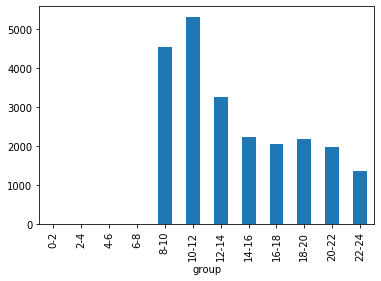

In [77]:
df.groupby('group').count()['time'].plot.bar()

In [78]:
day_plot = df.groupby('day').count()

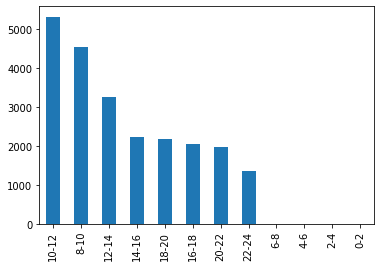

In [79]:
df['group'].value_counts().plot.bar()

In [80]:
set(hashtag)

{'3ZAAAP',
 '3แซ่บ',
 '4NOLOGUE',
 'AAECASEPASS',
 'AB61X',
 'AB6IX',
 'AB6IX1STFANMEETING',
 'AB6IX1STFANMEETINGINBKK',
 'AB6IX1STFMINBKK',
 'AB6IXINBKK',
 'ABNEW',
 'AHGASESFIGHTING',
 'AHNYUJIN',
 'AIRPOD',
 'AIRPODS',
 'ATEEZ',
 'BAMBAM',
 'BDJINYOUNG',
 'BDMARKTUAN',
 'BDYOUNGJAE',
 'BIGBANG',
 'BIGSTAR',
 'BLACKPINK',
 'BOSS',
 'BOYSTORY',
 'BRINGTHESOUL_DOCUSERIES',
 'BTS',
 'BVNDIT',
 'CHAEUNWOOINBKK',
 'CHUNGHA',
 'CIX',
 'CIXHELLOSTRANGERINBKK',
 'COVERSTARK',
 'COVERSTARKDANCE',
 'DANIELKSOLODEBUT',
 'DAY6GRAVITYINBKK',
 'DDD',
 'DENLIE',
 'DONGPYO',
 'ECLIPSE',
 'EVERGLOW',
 'EVERGROW',
 'EXO',
 'EXOELEMENTTH',
 'EXOPLORATIONINBKK',
 'EXPLORATIONBKK',
 'EXPLORATIONINBBK',
 'EXPLORATIONINBKK',
 'EXPLORATIONINBKKขายบัตร',
 'EXPLORATIONINBKKแลกบัตร',
 'EXPLORATIONINSINGAPORE',
 'FANFESTINBKK',
 'FLASH',
 'FLAϞH',
 'FMMพร้อมส่ง',
 'GIDLE',
 'GIVEAWAYAB6IXINBKK',
 'GOLDENCHILD',
 'GOLDENNESS',
 'GOLDEN_CHILD',
 'GOT2DAY2019',
 'GOT7',
 'GOT71STFANEVENTINTHAILAND',
 'GOT7FANFESTI

# Day 1

In [81]:
boystory = hashtag.count('BOYSTORY')
everglow = hashtag.count('EVERGLOW')
goldenchild = hashtag.count('GOLDENCHILD') + hashtag.count('GOLDEN_CHILD')
got7 = hashtag.count('GOT7')
itzy = hashtag.count('ITZY')
kimjaehwan = hashtag.count('KIMJAEHWAN') + hashtag.count('คิมแจฮวาน')
nature = hashtag.count('NATURE')
oneus = hashtag.count('ONEUS')
theboyz = hashtag.count('THEBOYZ')
x1 = hashtag.count('X1')
nichkhun = hashtag.count('NICHKHUN') + hashtag.count('นิชคุณ')
gidle = hashtag.count('G_I_DLE') + hashtag.count('GIDLE')
ab6ix = hashtag.count('AB6IX')
ateez = hashtag.count('ATEEZ')
bvndit = hashtag.count('BVNDIT')
chungha = hashtag.count('CHUNGHA')
izone = hashtag.count('IZONE')
straykids = hashtag.count('STRAYKIDS')
varivary = hashtag.count('VERIVERY')

In [82]:
artist = ['BOYSTORY', 'EVERGLOW', 'GOLDENCHILD', 'GOT7', 'ITZY', 'KIMJAEHWAN', 'NATURE', 'ONEUS', 'THEBOYZ', 'X1', 'NICHKHUN', 'G_I_DLE', 'AB6IX', 'ATEEZ', 'BVNDIT', 'CHUNGHA', 'IZONE', 'STRAYKIDS', 'VERIVERY']
hashtag_count = [boystory, everglow, goldenchild, got7, itzy, kimjaehwan, nature, oneus, theboyz, x1, nichkhun, gidle, ab6ix, ateez, bvndit, chungha, izone, straykids, varivary]
artist_df = pd.DataFrame({'artist':artist, 'hashtag_count':hashtag_count})
artist_df = artist_df.set_index('artist')

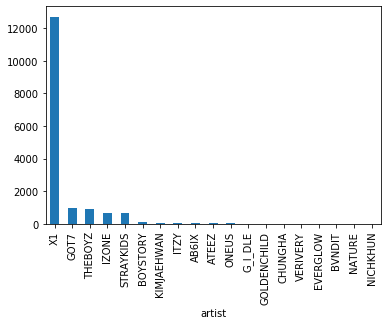

In [83]:
artist_df.sort_values(by=['hashtag_count'], ascending=False)['hashtag_count'].plot.bar()

# Log nomalized

In [84]:
import numpy as np
import pandas as pd

artist_df['lognorm'] = np.log(1+artist_df['hashtag_count'])

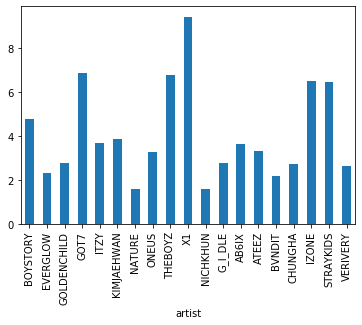

In [85]:
artist_df['lognorm'].plot.bar()

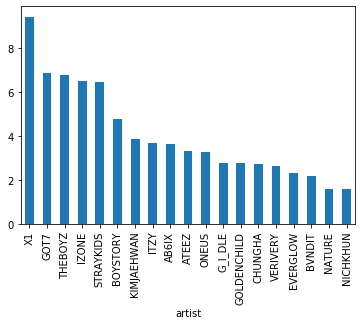

In [86]:
artist_df.sort_values(by=['lognorm'], ascending=False)['lognorm'].plot.bar()

In [89]:
hashtag.count('ITZY')

39

In [87]:
artist_df

,hashtag_count,lognorm
artist,,
BOYSTORY,118,4.779123
EVERGLOW,9,2.302585
GOLDENCHILD,15,2.772589
GOT7,993,6.901737
ITZY,39,3.688879
KIMJAEHWAN,47,3.871201
NATURE,4,1.609438
ONEUS,25,3.258097
THEBOYZ,895,6.797940
